Istim cst


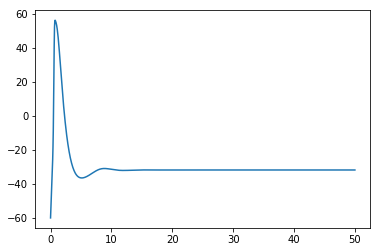

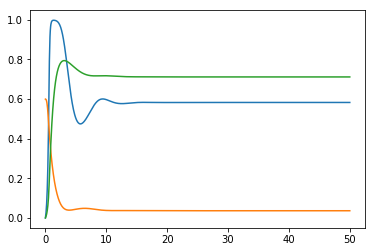

In [3]:
% matplotlib inline
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
h0=0.6
n0=0
m0=0
V0=-60
Istim=1
Cm = 0.01
gNa = 1.20
gK = 0.36
gL = 0.003

vNa = 55.15
vK = -49.42
vL = -72.14

def FVm(y,t,gNa,Istim):
    
    An = (0.01*(-y[0]-50.0))/(np.exp(-(y[0]+50.0)/10.0)-1)
    #An = (0.01(y[0]+50.0))/(1.0-np.exp(-(y[0]+50.0)/10.0))  Egual than the other An
    Bn = 0.125*np.exp(-(y[0]+60.0)/80.0)
    Am = (0.1*(-y[0]-35.0))/(np.exp(-(y[0]+35.0)/10.0)-1)
    #Am = (0.1(y[0]+35.0))/(1-np.exp(-(y[0]+35.0)/10.0))  Egual than the other Am
    Bm = 4.0*np.exp(-(y[0]+60.0)/18.0)
    Ah = 0.07*np.exp(-(y[0]+60.0)/20.0)
    Bh = 1.0/(1.0+np.exp(-(y[0]+30.0)/10.0)) 
    dVmdt=(1/Cm)*(Istim-gNa*(np.power((y[1]),(3)))*(y[2])*(y[0]-vNa)-gK*(np.power((y[3]),(4)))*(y[0]-vK)-gL*(y[0]-vL))
    dmdt= Am*(1-y[1])-Bm*y[1]
    dndt= An*(1-y[3])-Bn*y[3]
    dhdt= Ah*(1-y[2])-Bh*y[2]
   
    
    #y[0]=Vm    y[1]=m     y[2]=h   y[3]=n  

    return [dVmdt,dmdt,dhdt,dndt ]



y0=[V0,m0,h0,n0]

time1=np.linspace(0,50,1000)
Vm1=odeint(FVm,y0,time1,args=(gNa,Istim))
VM , m , h , n = Vm1[:,0] , Vm1[:,1] , Vm1[:,2] ,  Vm1[:,3] 

print('Istim cst')
plt.plot(time1,VM)
plt.show()
plt.plot(time1,m)
plt.plot(time1,h)
plt.plot(time1,n)
plt.show()

